# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# regression
import seaborn as sns
from scipy import stats as st

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
rows = []

for i in range(len(cities)):
    city = cities[i]
    
    # print every 50th city
    if i % 50 == 0:
        print()
        print(f"Index: {i}, City: {city}")
    
    row = {}
    try:
    
        # get the geocode, lat and long
        url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
        response = requests.get(url)

        if (response.status_code == 200):
            data = response.json()

            if (len(data) > 0):
                lat = data[0]["lat"]
                lon = data[0]["lon"]

                # make another request to get weather
                url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
                response2 = requests.get(url2)

                if (response2.status_code == 200):
                    data2 = response2.json()

                    weather = data2["weather"][0]["main"]
                    temp = data2["main"]["temp"]
                    humid = data2["main"]["humidity"]
                    pressure = data2["main"]["pressure"]
                    wind = data2["wind"]["speed"]
                else:
                    print(f"Weather request failed for {city}")
                    weather = None
                    temp = np.nan
                    humid = np.nan
                    pressure = np.nan
                    wind = np.nan

                row["city"] = city
                row["latitude"] = lat
                row["longitude"] = lon
                row["weather"] = weather
                row["temperature"] = temp
                row["humidity"] = humid
                row["pressure"] = pressure
                row["wind_speed"] = wind

                rows.append(row)

            else:
                print(f"No lat/long for {city}.")
                pass
        else:
            print(f"Failed to get geocode for {city}.")
            pass
    except Exception as e:
        print(e)
        print(f"Oh no! An error has occurred with {city}.")
        print()
        
    # sleep
    time.sleep(2)


Index: 0, City: maykor

Index: 50, City: busselton
No lat/long for taolanaro.

Index: 100, City: bathsheba
No lat/long for tumannyy.
No lat/long for cherskiy.
No lat/long for shache.
No lat/long for bardiyah.

Index: 150, City: kilindoni
No lat/long for mnogovershinnyy.

Index: 200, City: katherine
No lat/long for shatalovo.

Index: 250, City: quatre cocos
No lat/long for yuzhno-yeniseyskiy.
No lat/long for beringovskiy.
No lat/long for samalaeulu.
No lat/long for sentyabrskiy.

Index: 300, City: sao felix do xingu
No lat/long for kattivakkam.

Index: 350, City: te anau

Index: 400, City: lowestoft
No lat/long for gazanjyk.

Index: 450, City: falmouth
No lat/long for karauzyak.
No lat/long for viligili.
No lat/long for kankon.

Index: 500, City: san isidro
No lat/long for tabiauea.
No lat/long for bambanglipuro.
No lat/long for dicabisagan.
No lat/long for pyaozerskiy.

Index: 550, City: sao joao da barra
No lat/long for mrirt.
No lat/long for shumskiy.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df = pd.DataFrame(rows)
df.head()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed
0,maykor,59.007140,55.886933,Snow,33.94,98,1016,5.23
1,butaritari,2.920538,172.918863,Clouds,81.88,71,1008,19.28
2,rikitea,-23.122954,-134.968014,Clouds,73.44,85,1017,9.26
3,pangnirtung,66.148020,-65.717283,Clouds,2.59,97,1009,2.57
4,kaitangata,-46.281739,169.846414,Clear,55.98,57,1027,11.70


In [9]:
df.describe()

,latitude,longitude,temperature,humidity,pressure,wind_speed
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,20.035089,15.306011,56.288479,74.994755,1014.774476,7.789878
std,33.324941,89.393117,23.389994,19.400335,8.267836,5.507912
min,-54.806116,-179.413096,-19.260000,10.000000,976.000000,0.000000
25%,-7.860407,-61.806005,42.450000,65.000000,1010.000000,3.525000
50%,22.636726,20.664671,62.045000,80.000000,1014.000000,6.170000
75%,48.617326,88.982323,75.150000,90.000000,1019.000000,10.650000
max,78.223156,178.680784,91.710000,100.000000,1039.000000,33.820000


In [10]:
df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
df.describe()

,latitude,longitude,temperature,humidity,pressure,wind_speed
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,20.035089,15.306011,56.288479,74.994755,1014.774476,7.789878
std,33.324941,89.393117,23.389994,19.400335,8.267836,5.507912
min,-54.806116,-179.413096,-19.260000,10.000000,976.000000,0.000000
25%,-7.860407,-61.806005,42.450000,65.000000,1010.000000,3.525000
50%,22.636726,20.664671,62.045000,80.000000,1014.000000,6.170000
75%,48.617326,88.982323,75.150000,90.000000,1019.000000,10.650000
max,78.223156,178.680784,91.710000,100.000000,1039.000000,33.820000


In [12]:
#  Get the indices of cities that have humidity over 100%.
mask = df.humidity > 100
df.loc[mask]

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

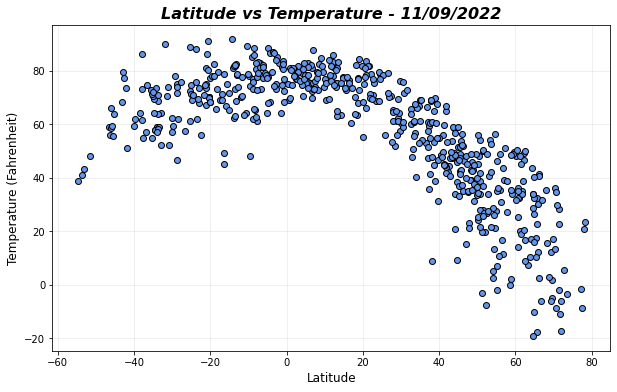

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.temperature, marker="o", facecolors="cornflowerblue", edgecolors="black", zorder=2)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temperature (Fahrenheit)", fontsize=12)
plt.grid(alpha=0.25, zorder=1)
plt.title("Latitude vs Temperature - 11/09/2022", fontsize=16, fontstyle="italic", fontweight="bold")

plt.savefig("latvstemp.png")
plt.show()

Here is a graph of the temperature as you go further north or south of the equator. As the graph shows, it gets colder towards the poles.

## Latitude vs. Humidity Plot

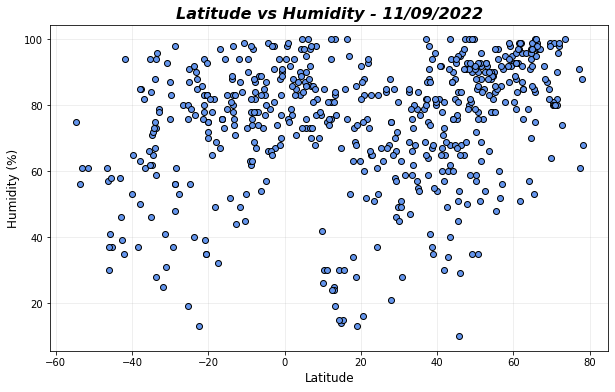

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.humidity, marker="o", facecolors="cornflowerblue", edgecolors="black", zorder=2)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(alpha=0.25, zorder=1)
plt.title("Latitude vs Humidity - 11/09/2022", fontsize=16, fontstyle="italic", fontweight="bold")

plt.savefig("latvshumid.png")
plt.show()

Here is a graph of a humidities at different latitudes. The humidity may increase due to a cities proximity to a body of water.

## Latitude vs. Wind Speed Plot

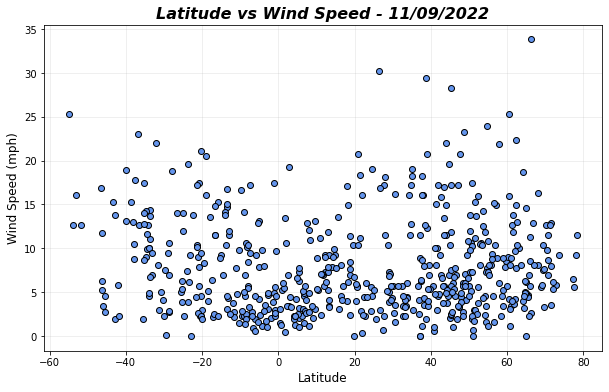

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.wind_speed, marker="o", facecolors="cornflowerblue", edgecolors="black", zorder=2)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(alpha=0.25, zorder=1)
plt.title("Latitude vs Wind Speed - 11/09/2022", fontsize=16, fontstyle="italic", fontweight="bold")

plt.savefig("latvsws.png")
plt.show()

Here is a graph of wind speed at different latitudes. Wind speed could vary based on the geography of the area, whether near a beach or in the mountains.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8593156188711415


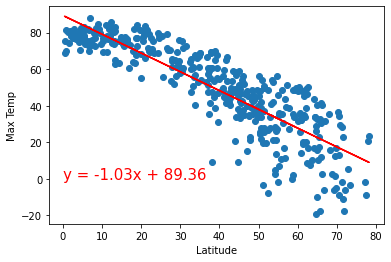

In [23]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5444196014307822


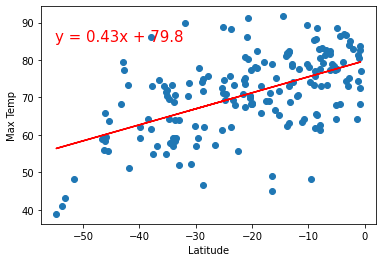

In [24]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2422391919839853


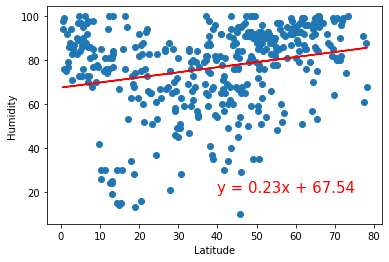

In [26]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

x_values = df2['latitude']
y_values = df2['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3909109480471572


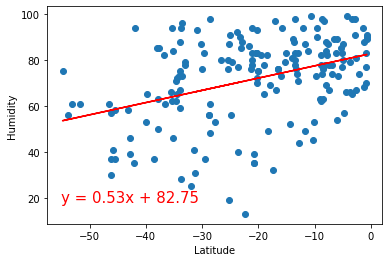

In [29]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

x_values = df2['latitude']
y_values = df2['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15903904865502563


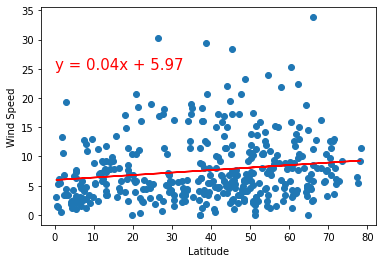

In [32]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

x_values = df2['latitude']
y_values = df2['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3375238544696952


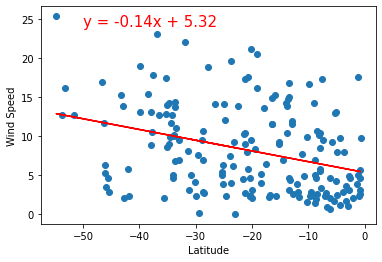

In [36]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

x_values = df2['latitude']
y_values = df2['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()